# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

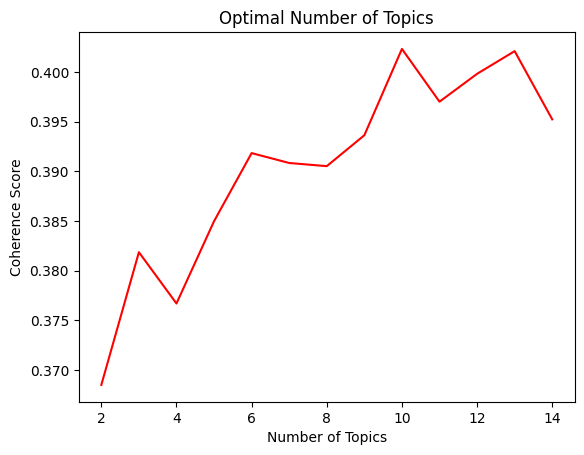

The optimal number of topics is: 10

Topics and top keywords:
Topic 1: processing, topic, modeling, technique, lda
Topic 2: topic, modeling, lda, useful, bag
Topic 3: topic, modeling, lda, useful, bag
Topic 4: modeling, topic, lda, natural, language
Topic 5: modeling, topic, lda, use, optimal
Topic 6: number, useful, topic, optimal, score
Topic 7: modeling, topic, lda, optimal, score
Topic 8: topic, lda, modeling, text, use
Topic 9: modeling, find, help, hidden, topic
Topic 10: representation, modeling, probabilistic, lda, word


In [29]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "LDA is a topic modeling technique in natural language processing.",
    "Topic modeling helps in finding the hidden structure in text.",
    "Coherence score is useful in determining the optimal number of topics.",
    "LDA uses bag of words representation and probabilistic modeling."
]

# Preprocessing function
def preprocess_text(texts):
    # Tokenize and lemmatize
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Function to calculate coherence score for different K values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Determine the optimal number of topics
limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values,color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Print topics and top keywords
topics = optimal_model.show_topics(num_topics=optimal_k, num_words=5, formatted=False)
print("\nTopics and top keywords:")
for idx, topic in topics:
    keywords = [word for word, _ in topic]
    print(f"Topic {idx+1}: {', '.join(keywords)}")

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

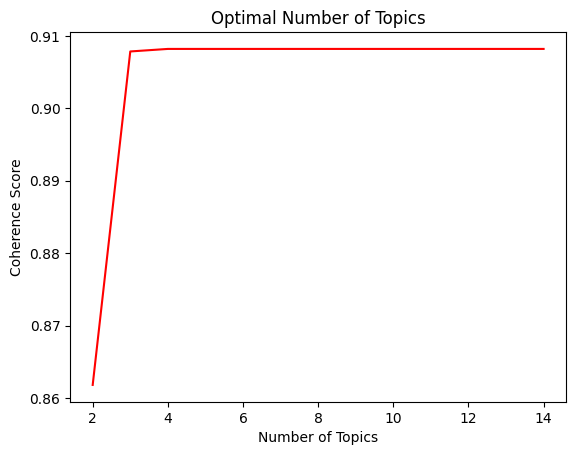

The optimal number of topics is: 4

Topics and top keywords:
Topic 1: modeling, lda, topic, natural, language
Topic 2: coherence, optimal, number, useful, score
Topic 3: text, structure, help, hidden, find
Topic 4: technique, language, processing, natural, topic


In [27]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
from gensim import corpora, models
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "LDA is a topic modeling technique in natural language processing.",
    "Topic modeling helps in finding the hidden structure in text.",
    "Coherence score is useful in determining the optimal number of topics.",
    "LDA uses bag of words representation and probabilistic modeling."
]

# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_data)

# Function to calculate coherence score for different K values
def compute_coherence_values(tfidf_matrix, texts, dictionary, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Apply LSA using SVD
        svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
        lsa_topics = svd_model.fit_transform(tfidf_matrix)

        # Get topic words and coherence score
        topics = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]] for topic in svd_model.components_]
        model_list.append(topics)

        # Convert topics to gensim-readable format for coherence score
        gensim_corpus = [dictionary.doc2bow(text.split()) for text in texts]
        coherence_model = CoherenceModel(topics=topics, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Create dictionary
dictionary = corpora.Dictionary([text.split() for text in processed_data])

# Determine the optimal number of topics
limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(tfidf_matrix, processed_data, dictionary, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values,color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_topics = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Print topics and top keywords
print("\nTopics and top keywords:")
for idx, topic in enumerate(optimal_topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [3]:
!pip install lda2vec-pytorch

ERROR: Could not find a version that satisfies the requirement lda2vec-pytorch (from versions: none)
ERROR: No matching distribution found for lda2vec-pytorch


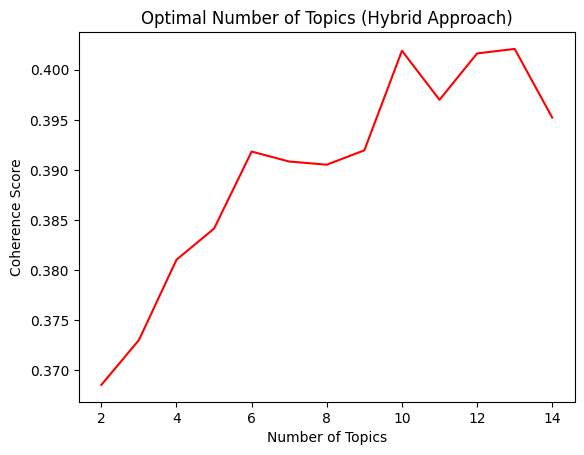

The optimal number of topics is: 13

Topics and top keywords with semantic enhancement:
Topic 1: modeling, topic, optimal, probabilistic, score, text, score, determine, find, score, number, lda, natural, optimal, structure
Topic 2: modeling, topic, lda, score, optimal, text, score, determine, find, help, probabilistic, optimal, structure, score, number
Topic 3: modeling, topic, optimal, probabilistic, score, text, score, determine, find, score, number, lda, natural, optimal, structure
Topic 4: lda, word, bag, probabilistic, representation, help, probabilistic, representation, technique, lda, probabilistic, lda, natural, technique, word
Topic 5: modeling, topic, structure, text, hidden, text, score, determine, find, score, natural, useful, modeling, representation, probabilistic
Topic 6: modeling, topic, lda, score, optimal, text, score, determine, find, help, probabilistic, optimal, structure, score, number
Topic 7: modeling, topic, lda, score, optimal, text, score, determine, find, he

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
from gensim import corpora, models
from gensim.models import Word2Vec, CoherenceModel
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "LDA is a topic modeling technique in natural language processing.",
    "Topic modeling helps in finding the hidden structure in text.",
    "Coherence score is useful in determining the optimal number of topics.",
    "LDA uses bag of words representation and probabilistic modeling."
]

# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary([text.split() for text in processed_data])
corpus = [dictionary.doc2bow(text.split()) for text in processed_data]

# Function to compute coherence scores for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Determine the optimal number of topics
start, limit, step = 2, 15, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_data, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values,color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics (Hybrid Approach)")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Train Word2Vec model on processed data
sentences = [text.split() for text in processed_data]
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Enhance LDA topics with word embeddings
print("\nTopics and top keywords with semantic enhancement:")
for idx, topic in enumerate(optimal_model.show_topics(formatted=False, num_words=5)):
    keywords = [word for word, prob in topic[1]]
    # Enhance with semantically similar words using Word2Vec
    enhanced_keywords = []
    for word in keywords:
        if word in w2v_model.wv:
            similar_words = [w[0] for w in w2v_model.wv.most_similar(word, topn=2)]
            enhanced_keywords.extend(similar_words)
    print(f"Topic {idx+1}: {', '.join(keywords + enhanced_keywords)}")

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [5]:
# Install BERTopic and sentence-transformers
!pip install bertopic
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [26]:
# Import necessary libraries
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import spacy

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "Text data about machine learning and data science.",
    "Research papers in healthcare and diagnostics.",
    "Social media content analysis on platforms like Twitter.",
    "Advancements in natural language processing and text analysis.",
    "Technology in education for students and teachers.",
    "Studies on climate change and environmental impacts.",
    "Financial data analysis including stock market trends.",
    "Customer sentiment and product feedback analysis.",
    "Cybersecurity protocols and network security.",
    "Renewable energy resources and consumption patterns."
    "LDA is a topic modeling technique in natural language processing.",
    "Topic modeling helps in finding the hidden structure in text.",
    "Coherence score is useful in determining the optimal number of topics.",
    "LDA uses bag of words representation and probabilistic modeling."
]
# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Initialize and fit the BERTopic model
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(processed_data)

# Retrieve topic representations (top words) for coherence calculation
topics_list = topic_model.get_topics()
topic_words = []
for _, topic in topics_list.items():
    words = [word[0] for word in topic[:5]]
    topic_words.append(words)

# Prepare texts in tokenized format for coherence model
tokenized_texts = [text.split() for text in processed_data]

# Create a gensim dictionary
dictionary = Dictionary(tokenized_texts)

# Calculate coherence score
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence="c_v"
)
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score for BERTopic model: {coherence_score}")

# Display topic summaries
print("\nThe Summarized Topics of the model are:")
for idx, topic in enumerate(topic_words):
    print(f"Topic {idx+1}: {', '.join(topic)}")

Coherence Score for BERTopic model: 0.2643360186238529

The Summarized Topics of the model are:
Topic 1: analysis, modeling, topic, text, datum


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [16]:
# Write your code here
'''We have tested the 4 topic modeling algorithms, out of all the topic modeling algorithms LDA is the best performed algorithm.
LDA is the probabilistic foundationa and is generally made with the human-interpretable topics. It also performs the dimentionality reduction.
LDA creates more coherant topics and it makes the words to clearly understand and relate with each other.
The results in this modeling algorithm stay stable and they are stable across multiple runs.
The other topic modeling algorithms mix the unrelated words and they gave the confusing results.'''


'We have tested the 4 topic modeling algorithms, out of all the topic modeling algorithms LDA is the best performed algorithm.\nLDA is the probabilistic foundationa and is generally made with the human-interpretable topics. It also performs the dimentionality reduction.\nLDA creates more coherant topics and it makes the words to clearly understand and relate with each other.\nThe results in this modeling algorithm stay stable and they are stable across multiple runs.\nThe other topic modeling algorithms mix the unrelated words and they gave the confusing results.'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [30]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This is interesting to and coding this is also very interesting. particularly their unique approaches to capture latent structures in text data. All the algorithms provided the hands-on experiences.
I found it challenging when I am setting up lda2vec and trobule shooting the problem with that.
This assignment is directly relavent to NLP. Topic modeling is the foundation in understanding the summarizing and clustering the text data.



'''

'\nThis is interesting to and coding this is also very interesting. particularly their unique approaches to capture latent structures in text data. All the algorithms provided the hands-on experiences. \nI found it challenging when I am setting up lda2vec and trobule shooting the problem with that.\nThis assignment is directly relavent to NLP. Topic modeling is the foundation in understanding the summarizing and clustering the text data.\n\n\n\n'